<a href="https://colab.research.google.com/github/lucianacarvl/on29-python-s10-pandas-numpy-II/blob/main/exercicios/para-casa/exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0        2022
1        2022
2        2020
3        2022
4        2021
         ... 
99995    2020
99996    2020
99997    2022
99998    2020
99999    2021
Name: Ano, Length: 100000, dtype: int32


Ano
2020    26.879241
2021    27.461216
2022    27.305685
Name: TEMPERATURA DO AR - BULBO SECO. HORARIA (C), dtype: float64


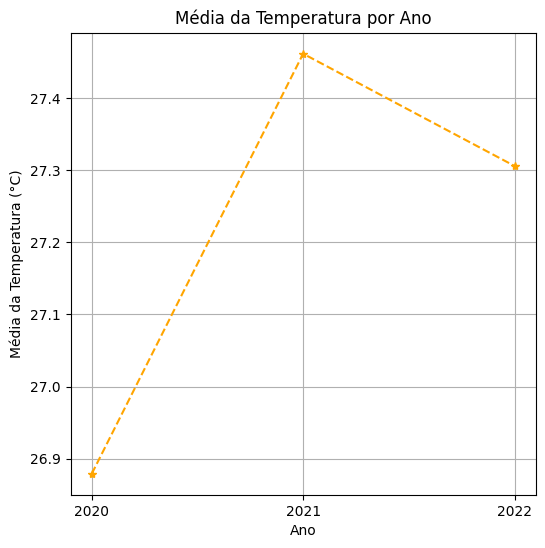

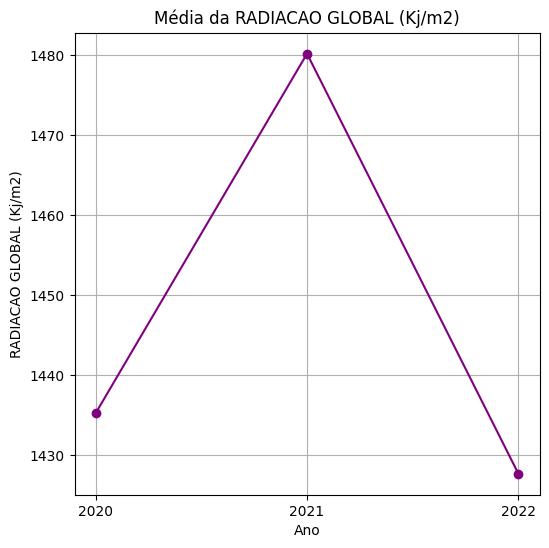

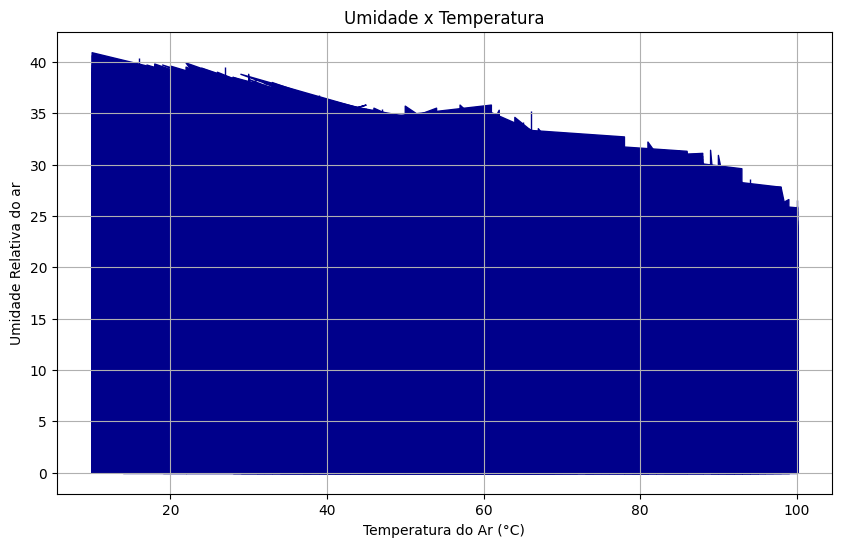

In [5]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data_sample_PI.csv', sep=';' , encoding='UTF-8')

df_nan = df.dropna(subset=['TEMPERATURA DO AR - BULBO SECO. HORARIA (C)'])
df_nan = df.dropna(subset=['RADIACAO GLOBAL (Kj/m2)'])
df_nan = df.dropna()


df['Data'] = pd.to_datetime(df['Data'])
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
df['Ano'] = df['Data'].dt.year
print(df['Ano'])
print("\n")

ano = df['Ano'].unique()
media_por_ano = df.groupby('Ano')['TEMPERATURA DO AR - BULBO SECO. HORARIA (C)'].mean()
print(media_por_ano)

plt.figure(figsize=(6, 6))
plt.plot(media_por_ano.index, media_por_ano.values, marker='*', linestyle='dashed', color='orange')
plt.title('Média da Temperatura por Ano')
plt.xlabel('Ano')
plt.ylabel('Média da Temperatura (°C)')
plt.xticks(list(ano))
plt.grid(True)
plt.show()

media_rd_por_ano = df.groupby('Ano')['RADIACAO GLOBAL (Kj/m2)'].mean()

plt.figure(figsize=(6, 6))
plt.plot(media_rd_por_ano.index, media_rd_por_ano.values, marker='o', linestyle='solid', color='purple')
plt.title('Média da RADIACAO GLOBAL (Kj/m2)')
plt.xlabel('Ano')
plt.ylabel('RADIACAO GLOBAL (Kj/m2)')
plt.xticks(list(ano))
plt.grid(True)
plt.show()

#UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)
#UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)
#O que significa umidade relativa do ar?
#Significa o quanto de água na forma de vapor existe na atmosfera no momento em relação ao total máximo que poderia existir, na temperatura observada. A umidade do ar é mais baixa principalmente no final do inverno e início da primavera, no período da tarde, entre 12 e 16 horas. A umidade fica mais alta:
#Sempre que chove devido à evaporação que ocorre posteriormente, Em áreas florestadas ou próximas aos rios ou represa, Quando a temperatura diminui (orvalho).

plt.figure(figsize=(10, 6))
plt.fill_between(df['UMIDADE RELATIVA DO AR. HORARIA (%)'], df['TEMPERATURA DO AR - BULBO SECO. HORARIA (C)'], color='darkblue', linestyle='solid')
plt.title('Umidade x Temperatura')
plt.xlabel('Temperatura do Ar (°C)')
plt.ylabel('Umidade Relativa do ar')
plt.grid(True)
plt.show()

